In [1]:
#@formatter:off
%load_ext autoreload
%autoreload 2
#@formatter:on

In [17]:
import os
import pickle
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
metrics = pickle.load(open(os.path.join( 'metrics.pkl'), 'rb'))

In [19]:
metrics.keys()

dict_keys([0, 1, 2, 3, 4])

In [25]:
metrics[0]['greedy'][0].keys()

dict_keys(['predictions', 'bleu', 'precisions', 'brevity_penalty', 'length_ratio', 'translation_length', 'reference_length', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'perplexities', 'mean_perplexity'])

In [78]:
metrics[0]['greedy'][0]['rougeL']

AggregateScore(low=Score(precision=0.0196078431372549, recall=0.0008677439227928298, fmeasure=0.0016466969342879265), mid=Score(precision=0.03333333333333333, recall=0.0014865339154598327, fmeasure=0.0028208398313430572), high=Score(precision=0.050980392156862744, recall=0.002420703633297718, fmeasure=0.004551085275771271))

In [41]:
# gather important metrics
def gather_metric(metrics, metric_name):

    metric = {}
    for key,val in metrics.items():
        metric[key] = {k:[] for k in val.keys()}

        for k,v in val.items():
            tmp = []
            for i in v:
                tmp.append(i[metric_name])
            metric[key][k].append(tmp)
    return metric

In [42]:

perp_metrics = gather_metric(metrics, 'mean_perplexity')
print(perp_metrics)


{0: {'greedy': [[141.4683050997117, 141.4683050997117, 141.4683050997117, 141.4683050997117, 141.4683050997117, 141.4683050997117, 141.4683050997117, 141.4683050997117, 141.4683050997117, 141.4683050997117]], 'random': [[139.79206930137263, 136.0360833839714, 138.4677697570384, 138.20176023907132, 139.34325111494448, 134.8528708241604, 141.29468585310025, 144.05009829293928, 142.70239666170812, 141.47127050734963]], 'top_k': [[144.79004341697694, 139.84479117685436, 144.06535829844015, 155.229767208911, 139.16461872903923, 139.030904730592, 142.64828881259743, 143.61448117600497, 140.5625943750687, 139.0833985234937]], 'top_p': [[137.45314742189592, 141.2447936406274, 140.95309437325398, 140.61658944803125, 144.60698535667277, 139.21035256518786, 138.94587886507676, 138.35549251957943, 140.86915091402042, 139.65624974028478]]}, 1: {'greedy': [[130.01161079443347, 130.01161079443347, 130.01161079443347, 130.01161079443347, 130.01161079443347, 130.01161079443347, 130.01161079443347, 130.

In [54]:
def compose_metric_lists(metrics):
    greedy = []
    random = []
    top_k = []
    top_p = []
    for key,val in metrics.items():
        greedy.append(val['greedy'])
        random.append(val['random'])
        top_k.append(val['top_k'])
        top_p.append(val['top_p'])
    return np.array(greedy).flatten(), np.array(random).flatten(), np.array(top_k).flatten(), np.array(top_p).flatten()

In [55]:
greedy, random, top_k, top_p = compose_metric_lists(perp_metrics)

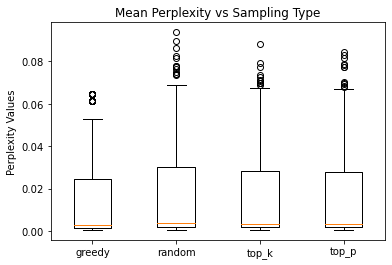

In [74]:
sampling_types = ['greedy','random', 'top_k', 'top_p']
perplexity_values = []
perplexity_values.append(greedy)
perplexity_values.append(random)
perplexity_values.append(top_k)
perplexity_values.append(top_p)
fig, ax = plt.subplots()
plt.title('Mean Perplexity vs Sampling Type')
ax.boxplot(perplexity_values)
ax.set_xticklabels(sampling_types)
plt.ylabel('Perplexity Values')
plt.savefig('img/perplexity.png')
plt.show()

array([0.01764706, 0.00083296, 0.0015832 , 0.03333333, 0.00151942,
       0.00288149, 0.04901961, 0.00233808, 0.0044205 , 0.01764706,
       0.00083296, 0.0015832 , 0.03333333, 0.00151942, 0.00288149,
       0.04901961, 0.00233808, 0.0044205 , 0.01764706, 0.00083296,
       0.0015832 , 0.03333333, 0.00151942, 0.00288149, 0.04901961,
       0.00233808, 0.0044205 , 0.01764706, 0.00083296, 0.0015832 ,
       0.03333333, 0.00151942, 0.00288149, 0.04901961, 0.00233808,
       0.0044205 , 0.01764706, 0.00083296, 0.0015832 , 0.03333333,
       0.00151942, 0.00288149, 0.04901961, 0.00233808, 0.0044205 ,
       0.01764706, 0.00083296, 0.0015832 , 0.03333333, 0.00151942,
       0.00288149, 0.04901961, 0.00233808, 0.0044205 , 0.01764706,
       0.00083296, 0.0015832 , 0.03333333, 0.00151942, 0.00288149,
       0.04901961, 0.00233808, 0.0044205 , 0.01764706, 0.00083296,
       0.0015832 , 0.03333333, 0.00151942, 0.00288149, 0.04901961,
       0.00233808, 0.0044205 , 0.01764706, 0.00083296, 0.00158

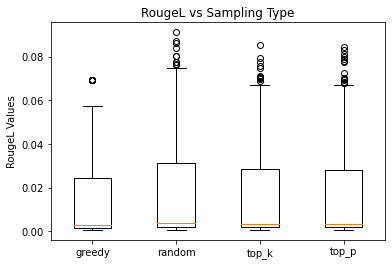

In [85]:
rougelsum_metrics = gather_metric(metrics, 'rougeL')
greedy, random, top_k, top_p = compose_metric_lists(rougelsum_metrics)
sampling_types = ['greedy','random', 'top_k', 'top_p']
rouge_lsum = []
rouge_lsum.append(greedy)
rouge_lsum.append(random)
rouge_lsum.append(top_k)
rouge_lsum.append(top_p)
fig, ax = plt.subplots()
plt.title('RougeL vs Sampling Type')
ax.boxplot(rouge_lsum)
ax.set_xticklabels(sampling_types)
plt.ylabel('RougeL Values')
plt.savefig('img/rougel.png')
plt.show()

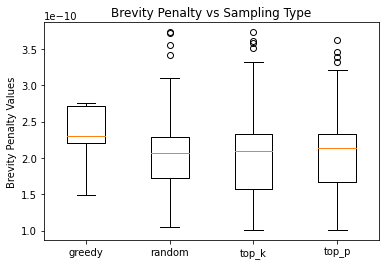

In [71]:
brevity_metrics = gather_metric(metrics, 'brevity_penalty')
greedy, random, top_k, top_p = compose_metric_lists(brevity_metrics)
sampling_types = ['greedy','random', 'top_k', 'top_p']
brevity = []
brevity.append(greedy)
brevity.append(random)
brevity.append(top_k)
brevity.append(top_p)
fig, ax = plt.subplots()
plt.title('Brevity Penalty vs Sampling Type')
ax.boxplot(brevity)
ax.set_xticklabels(sampling_types)
plt.ylabel('Brevity Penalty Values')
plt.savefig('img/brevity_penalty.png')
plt.show()

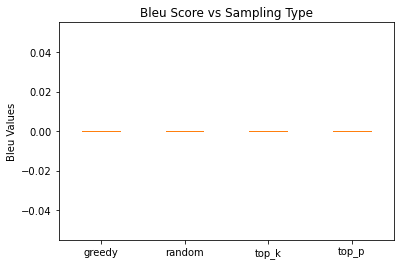

In [72]:
brevity_metrics = gather_metric(metrics, 'bleu')
greedy, random, top_k, top_p = compose_metric_lists(brevity_metrics)
sampling_types = ['greedy','random', 'top_k', 'top_p']
brevity = []
brevity.append(greedy)
brevity.append(random)
brevity.append(top_k)
brevity.append(top_p)
fig, ax = plt.subplots()
plt.title('Bleu Score vs Sampling Type')
ax.boxplot(brevity)
ax.set_xticklabels(sampling_types)
plt.ylabel('Bleu Values')
plt.savefig('img/bleu_score.png')
plt.show()

In [69]:
preds = gather_metric(metrics, 'predictions')

In [70]:
preds

{0: {'greedy': [['[START] this difference generally results in jtwc maximum winds appearing higher than the maximum winds described by the jma for the same cyclone closure bolívar deacons <UNK> big artwork artwork incurred oversized berhtwald trypanosoma <UNK> bride officials grammarian interscope tributary repaired sieur poeti progress <UNK> sharpened nicollette reprisal labour epstein alfonso spoof superstructure importins bestselling hadrosaurids solidify hearing leukemia paced horrible hoot 502 cursing analysis vacations cadets minster nicknames instruct cobra ablution refreshingly otranto',
    '[START] this difference generally results in jtwc maximum winds appearing higher than the maximum winds described by the jma for the same cyclone closure bolívar deacons <UNK> big artwork artwork incurred oversized berhtwald trypanosoma <UNK> bride officials grammarian interscope tributary repaired sieur poeti progress <UNK> sharpened nicollette reprisal labour epstein alfonso spoof supe